In [6]:
import pandas as pandas
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
import os
os.chdir("/home/gachuki/Downloads/car price prediction")

In [8]:
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
print(car_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [14]:
print(car_data['Year'].value_counts())

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64


In [15]:
print(car_data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [16]:
fuel_type = car_data["Fuel_Type"]
transmission_type = car_data["Transmission"]
seller_type = car_data["Seller_Type"]
seller_price = car_data["Selling_Price"]

In [17]:
from matplotlib import style

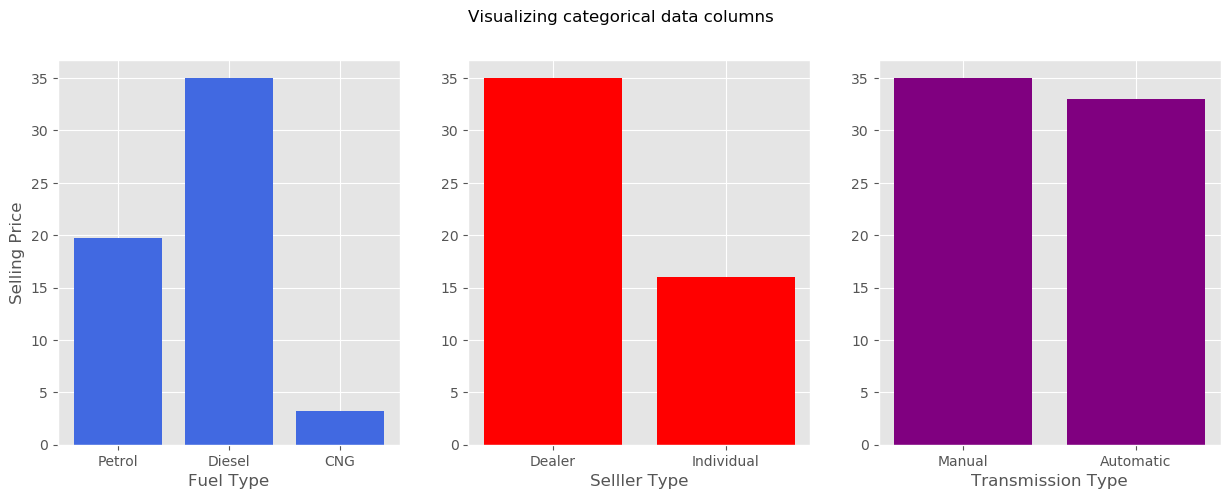

In [18]:
style.use('ggplot')
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1, 3, 1)
plt.bar(fuel_type, seller_price, color='royalblue')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')

plt.subplot(1, 3, 2)
plt.bar(seller_type, seller_price, color='red')
plt.xlabel('Selller Type')

plt.subplot(1, 3, 3)
plt.bar(transmission_type, seller_price, color='purple')
plt.xlabel('Transmission Type')

plt.show()

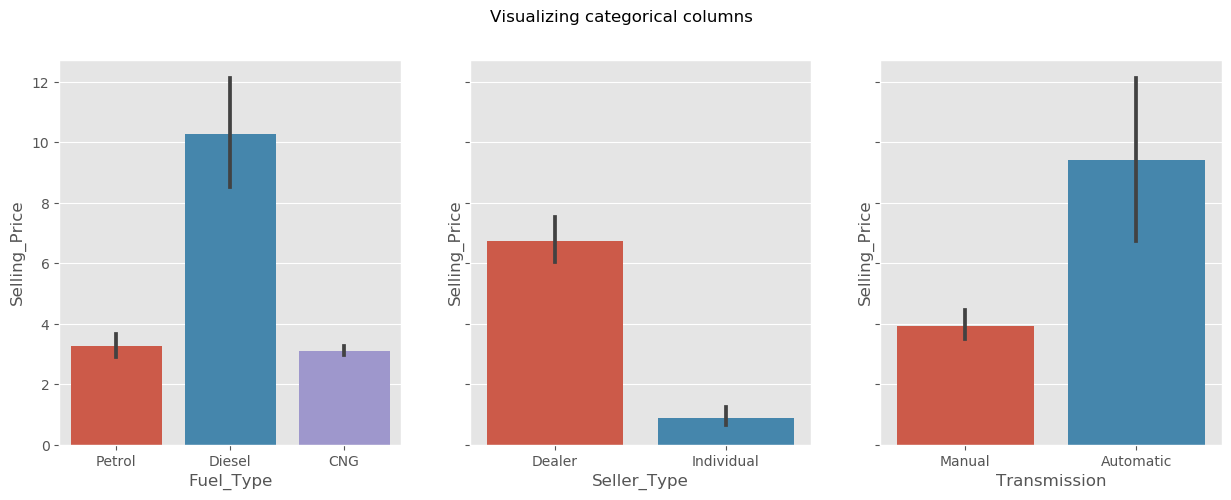

In [19]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey="all")
fig.suptitle("Visualizing categorical columns")
sns.barplot(x = fuel_type, y = seller_price, ax=axes[0])
sns.barplot(x = seller_type, y = seller_price, ax=axes[1])
sns.barplot(x = transmission_type, y = seller_price, ax=axes[2])

In [20]:
petrol_data = car_data.groupby("Fuel_Type").get_group("Petrol")
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


The first illustration plots the highest values while the second illustration plots the mean values

In [21]:
dealer_data = car_data.groupby("Seller_Type").get_group("Dealer")
dealer_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


manual encoding

In [22]:
car_data.replace({'Fuel_Type':{'Petrol': 0, "Diesel": 1, 'CNG': 2}}, inplace = True)

one hot encoding

In [23]:
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

In [24]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


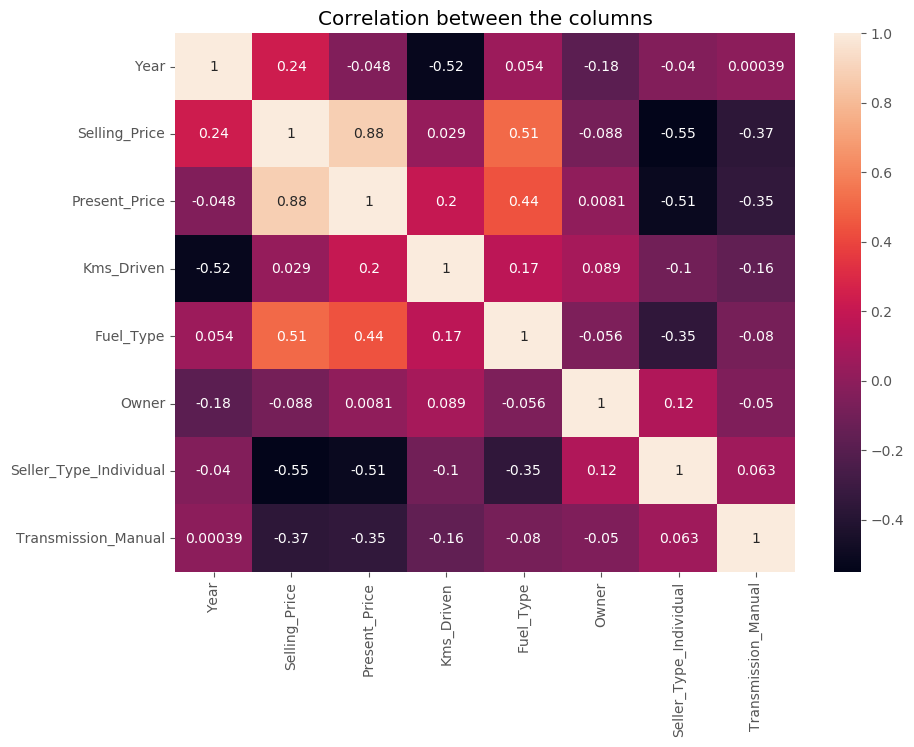

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

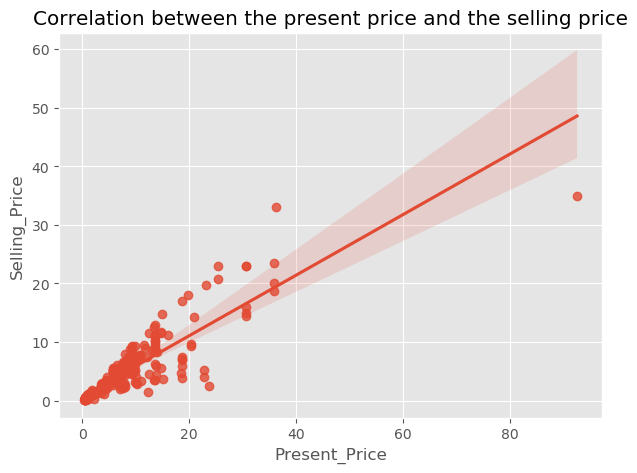

In [26]:
fig = plt.figure(figsize= (7, 5))
plt.title('Correlation between the present price and the selling price')
sns.regplot(x = 'Present_Price', y = 'Selling_Price', data=car_data)

In [27]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_data['Selling_Price']

In [28]:
print("Shape of X is : ", X.shape)
print("Shape of Y is : ", Y.shape)

Shape of X is :  (301, 7)
Shape of Y is :  (301,)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [30]:
print("X_test shape : ", X_test.shape)
print("X_train shape : ", X_train.shape)
print("Y_test shape : ", Y_test.shape)
print("Y_train shape : ", Y_train.shape)

X_test shape :  (91, 7)
X_train shape :  (210, 7)
Y_test shape :  (91,)
Y_train shape :  (210,)


In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, Y_train)

LinearRegression()

In [35]:
pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
print("Mean absolute error : ", (metrics.mean_absolute_error(pred, Y_test)))
print("Mean squared error : ", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score : ", (metrics.r2_score(pred, Y_test)))

Mean absolute error :  1.2581404706473371
Mean squared error :  3.4932860262251446
R2 score :  0.8294933369778819


mean absolute error and mean squared error are used to predict how close the predicted values are to the actual values
r2 error is an indication of how well a model fits the data. the higher the better in most errors

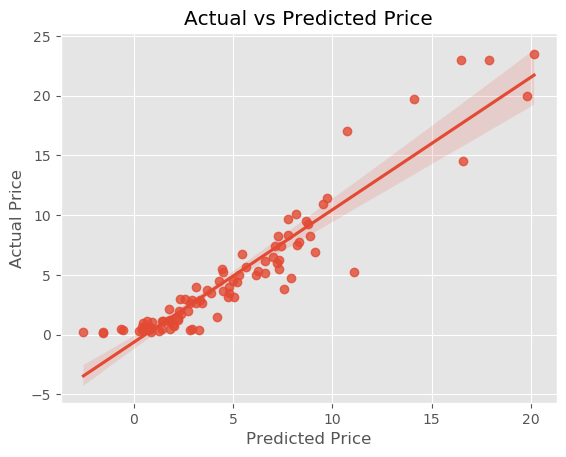

In [38]:
sns.regplot(x = pred, y = Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()